In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')

In [ ]:
drop_row_index = df[df['Year'] > 2015].index
df = df.drop(drop_row_index)

<h3>Which Platform has the most available games</h3>

In [ ]:
Platform_list = pd.Series(np.random.choice(list('Platform'), 1000))
Platform = df.Platform.value_counts(ascending=False)
Platform.plot.barh( figsize=(20,10)).invert_yaxis()
plt.title('Number of games availbale per Platform', fontsize=20)
plt.xlabel('No. of Product', fontsize=15)

![](https://seeklogo.com/images/P/playstation-2-logo-F384843875-seeklogo.com.png)![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGdxJEYpUoWTZGNlcrKWiN9nQUtKBMGXO1NA&usqp=CAU&ec=45761791)<h1>DS and PS2 has the most games available</h1>

<h3>Which Publisher has the most games published</h3>

In [ ]:
Publisher_list = pd.Series(np.random.choice(list('Publisher'),1000))
Publisher = df.Publisher.value_counts(ascending=False)
Publisher[:5].plot.pie(autopct='%1.1f%%', figsize=(24,12), textprops={'fontsize':18})
plt.title('Top 5 Publisher who created the games most', fontsize='15')
plt.legend(labels=Publisher, title='Games Created in Numbers', loc=[1.1, 0.5])

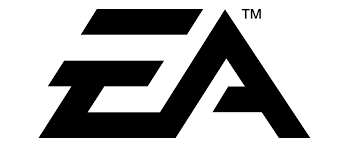<h1> Electronic Arts published 1331 Games</h1>

<h3>Which Platform mostly sold at the North America Region</h3>

In [ ]:
NA_sales = df.groupby(by=['Platform'])['NA_Sales'].sum()
NA_sales = NA_sales.reset_index()
NA_sales = NA_sales.sort_values(by=['NA_Sales'], ascending=False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="NA_Sales", data=NA_sales, palette=['red'])
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform in North America', fontsize='20')

![](https://designcmdkit.files.wordpress.com/2013/03/xbox-logo1.jpg)<h1>XBOX 360 has the most sold Game Platform in North America</h1>

<h3>Which Platform mostly sold at Europe Region</h3>

In [ ]:
EU_sales = df.groupby(by=['Platform'])['EU_Sales'].sum()
EU_sales = EU_sales.reset_index()
EU_sales = EU_sales.sort_values(by=['EU_Sales'], ascending=False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="EU_Sales", data=EU_sales, palette=['green'])
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform in Europe', fontsize='20')

![](https://www.nicepng.com/png/detail/882-8826079_ps3-playstation-3-slim-logo.png)<h1>PS3 has the most sold Game Platform in Europe</h1>

# <h3>Which Game Platform mostly sold at Japan Region</h3>

In [ ]:
JP_sales = df.groupby(by=['Platform'])['JP_Sales'].sum()
JP_sales = JP_sales.reset_index()
JP_sales = JP_sales.sort_values(by=['JP_Sales'], ascending=False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="JP_Sales", data=JP_sales, palette=['yellow'])
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform in Japan', fontsize='20')

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGdxJEYpUoWTZGNlcrKWiN9nQUtKBMGXO1NA&usqp=CAU&ec=45761791)<h1>Nintendo DS has the most sold Game Platform in Japan</h1>

# <h3>Which Game Platform mostly sold at Other Region</h3>

In [ ]:
other_sales = df.groupby(by=['Platform'])['Other_Sales'].sum()
other_sales = other_sales.reset_index()
other_sales = other_sales.sort_values(by=['Other_Sales'], ascending=False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Other_Sales", data=other_sales)
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform in Other Countries', fontsize='20')

![](https://seeklogo.com/images/P/playstation-2-logo-F384843875-seeklogo.com.png)<h1>PS2 has the most sold Game Platform in Other Region</h1>

In [ ]:
global_sales = df.groupby(by=['Platform'])['Global_Sales'].sum()
global_sales = global_sales.reset_index()
global_sales = global_sales.sort_values(by=['Global_Sales'], ascending=False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y='Global_Sales', data=global_sales)
plt.xticks(rotation=90)
plt.title('Most Games sold by Plaform Globally', fontsize='20')

![](https://seeklogo.com/images/P/playstation-2-logo-F384843875-seeklogo.com.png)<h1>PS2 has the most sold Game Platform Globally</h1>

In [ ]:
data1 = pd.read_csv('../input/videogamesales/vgsales.csv')
data1.rename(columns={'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Other'},inplace=True)

In [ ]:
global_sales = data1[['North America', 'Europe', 'Japan', 'Other']]
global_sales = global_sales.sum().reset_index()
global_sales = global_sales.rename(columns={"index": "region", 0: "sale_total"})

In [ ]:
labels = global_sales['region']
sales = global_sales['sale_total']

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sales, autopct='%1.1f%%', startangle=90)
plt.legend(labels = global_sales['region'], title='Produced by numbers', loc=[1.1, 0.5])
plt.title('Global Sales Breakdown', fontsize=15)

* <h1> North America Region covered 50% of the Global Sales</h1>

I suggest game publishers and other companies might need to publish games where the language is english.